<a href="https://colab.research.google.com/github/rajansingh387/projects/blob/main/tring_pca_with_95_columns_oil_spill_rajan_singh_ml_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting colab with gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/oil_spill.csv')
#reading the dataset

In [ ]:
df.head()
#displaying top 5 values

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [ ]:
df.isnull().sum()
#checking null values

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [ ]:
df.columns
#checkng

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [ ]:
df.dtypes.value_counts()
#checking datatypes

float64    39
int64      11
dtype: int64

In [ ]:
df.duplicated().sum()
#checking duplicates

0

In [ ]:
df1= df.copy()
#creating a copy in case something goes wrong

In [ ]:
df.shape
#checking shape there are 937 rows and 50 columns 

(937, 50)

In [ ]:
for i in df.columns:
  if df[i].nunique()==1:
    print(f"{i} has 1 uniquee value so it won't be that usefull so for now we can drop it")
    df.drop(i, axis=1, inplace= True)
    
#created a func to check if there is any column with just one unique value

f_23 has 1 uniquee value so it won't be that usefull so for now we can drop it


In [ ]:
df.nunique()

f_1       238
f_2       297
f_3       927
f_4       933
f_5       179
f_6       375
f_7       820
f_8       618
f_9       561
f_10       57
f_11      577
f_12       59
f_13       73
f_14      107
f_15       53
f_16       91
f_17      893
f_18      810
f_19      170
f_20       53
f_21       68
f_22        9
f_24       92
f_25        9
f_26        8
f_27        9
f_28      308
f_29      447
f_30      392
f_31      107
f_32       42
f_33        4
f_34       45
f_35      141
f_36      110
f_37        3
f_38      758
f_39        9
f_40        9
f_41      388
f_42      220
f_43      644
f_44      649
f_45      499
f_46        2
f_47      937
f_48      169
f_49      286
target      2
dtype: int64

In [ ]:
df.describe().T
#describing data used .T to show it in different way

,count,mean,std,min,25%,50%,75%,max
f_1,937.0,81.588047,6.497673e+01,1.00,31.00,64.00,124.00,352.00
f_2,937.0,332.842049,1.931939e+03,10.00,20.00,65.00,132.00,32389.00
f_3,937.0,698.707086,5.999656e+02,1.92,85.27,704.37,1223.48,1893.08
f_4,937.0,870.992209,5.227993e+02,1.00,444.20,761.28,1260.37,2724.57
f_5,937.0,84.121665,4.536177e+01,0.00,54.00,73.00,117.00,180.00
f_6,937.0,769696.378869,3.831151e+06,70312.00,125000.00,186300.00,330468.00,71315000.00
f_7,937.0,43.242721,1.271840e+01,21.24,33.65,39.97,52.42,82.64
f_8,937.0,9.127887,3.588878e+00,0.83,6.75,8.20,10.76,24.69
f_9,937.0,3940.712914,8.167428e+03,667.00,1371.00,2090.00,3435.00,160740.00
f_10,937.0,0.221003,9.031555e-02,0.02,0.16,0.20,0.26,0.74


In [ ]:
a= df['target'].value_counts()

<Axes: >

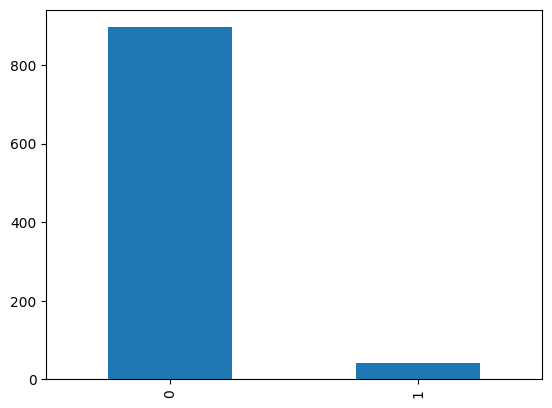

In [ ]:
a.plot(kind= 'bar')
#ploting target column to check how many types of results are there

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#because there are too many columns we are going to do PCA 

In [ ]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38',
       'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47',
       'f_48', 'f_49', 'target'],
      dtype='object')

In [ ]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [ ]:
import seaborn as sns

In [ ]:
# creating x and y  variables to train data
x= df.drop('target',axis =1)
y= df['target']

In [ ]:
sc= StandardScaler()
xsc= sc.fit_transform(x)
print(type(xsc))
print(xsc.shape)
# doing standard scalling because it is must to do scaling before doing PCA

<class 'numpy.ndarray'>
(937, 48)


In [ ]:
pca = PCA()
pcomp= pca.fit_transform(xsc)


In [ ]:
print(pcomp.shape)

(937, 48)


In [ ]:
eig_val = pca.explained_variance_
eig_vec= pca.components_
print(eig_val)
# creating eigen value and eigen vector variables

[1.37012695e+01 9.45338281e+00 5.49193792e+00 3.37703345e+00
 1.95920793e+00 1.86300755e+00 1.51497638e+00 1.33024855e+00
 1.10615612e+00 1.00726775e+00 9.55022521e-01 7.37636421e-01
 6.62993590e-01 6.03917798e-01 5.72509269e-01 5.06034823e-01
 4.76017801e-01 4.19167704e-01 3.78747779e-01 2.73057795e-01
 2.41097289e-01 2.07648267e-01 1.95138466e-01 1.62461028e-01
 1.36906198e-01 1.13032006e-01 1.04375550e-01 9.55811729e-02
 7.98303301e-02 6.59347997e-02 5.44439401e-02 4.85305246e-02
 4.01576371e-02 3.45145550e-02 2.93782214e-02 1.68570418e-02
 1.35890231e-02 5.18511211e-03 4.29079107e-03 3.55667672e-03
 3.18610199e-03 2.01670870e-03 1.74697365e-03 1.57018761e-03
 3.33985082e-04 2.48948218e-04 7.68797488e-05 1.25979059e-07]


In [ ]:
print(eig_vec)

[[-8.48772418e-02  6.03853162e-02  6.21802201e-02 ...  8.00427566e-02
  -2.44993851e-01  2.55454061e-01]
 [-4.05210778e-02  2.63964738e-01  9.89370729e-02 ...  3.80310861e-02
   5.38756331e-02 -3.24306138e-02]
 [-1.60134663e-01  1.22185409e-01 -3.13688747e-01 ...  1.13100127e-02
  -3.64444321e-02 -2.62591862e-02]
 ...
 [-1.05035251e-03  3.39847694e-03 -2.29901560e-04 ... -2.38557070e-04
  -5.19672088e-03  3.32856236e-03]
 [ 3.87999615e-04  2.02786213e-03  1.45348130e-02 ... -8.65321146e-04
  -7.02989834e-01 -5.04369028e-02]
 [ 7.15433156e-07  9.01957180e-05  7.49655664e-06 ... -9.91174666e-06
   3.22961564e-04 -9.99256624e-05]]


In [ ]:
total= sum(eig_val)
var_eig_val= [(i/total)*100 for i in eig_val]
print(var_eig_val)
#showing % of columns(how much that column matters)

[28.513848031108274, 19.673528803240174, 11.42932651603493, 7.027977831368439, 4.077327071500727, 3.8771235100839077, 3.1528323879298132, 2.768393450840708, 2.302032480137463, 2.096234910098599, 1.9875068483185185, 1.5351024775095838, 1.3797625399236424, 1.256819324492405, 1.191454721219413, 1.0531140931079912, 0.9906453712115267, 0.8723340687073167, 0.7882157625902528, 0.5682632867597607, 0.5017499606940279, 0.4321388697739866, 0.4061045990882471, 0.33809925712119177, 0.2849168474705559, 0.23523202899889237, 0.21721699279590054, 0.19891492765044383, 0.1661356922654489, 0.13721756604630617, 0.1133038241623905, 0.10099735649331822, 0.083572457046571, 0.07182858304602277, 0.061139308073681814, 0.03508135699783862, 0.028280250855527374, 0.010790788275002603, 0.008929607882758468, 0.007401835221579998, 0.006630628474962122, 0.004196992489656067, 0.003635644210588701, 0.003267733020728982, 0.0006950596684423369, 0.0005180886079220165, 0.00015999520829905649, 2.6217626954180563e-07]


In [ ]:
import numpy as np
cumsum_eig_val= np.cumsum(var_eig_val)
print(cumsum_eig_val)


[ 28.51384803  48.18737683  59.61670335  66.64468118  70.72200825
  74.59913176  77.75196415  80.5203576   82.82239008  84.91862499
  86.90613184  88.44123432  89.82099686  91.07781618  92.2692709
  93.322385    94.31303037  95.18536444  95.9735802   96.54184349
  97.04359345  97.47573232  97.88183692  98.21993617  98.50485302
  98.74008505  98.95730204  99.15621697  99.32235266  99.45957023
  99.57287405  99.67387141  99.75744387  99.82927245  99.89041176
  99.92549311  99.95377336  99.96456415  99.97349376  99.9808956
  99.98752622  99.99172322  99.99535886  99.99862659  99.99932165
  99.99983974  99.99999974 100.        ]


In [ ]:
print(len(x.columns))

48


In [ ]:
pc_names= ["pc"+str(i) for i in range(1,49)]
# assigning names to all of the 48 columns for the pie chart

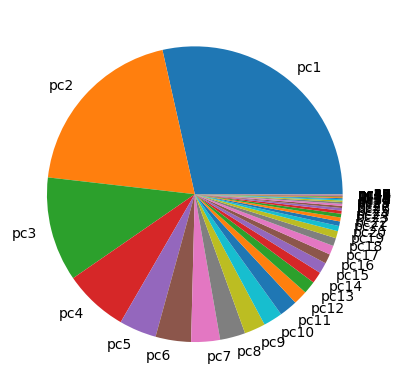

In [ ]:
import matplotlib.pyplot as plt
plt.pie(x=eig_val, labels=pc_names)
plt.show()
#showing which column matters the most

In [ ]:
pca_df= pd.DataFrame(pcomp, columns=[f'pcomp{i}' for i in range(1,49)])
# assigning names to all of the 48 columns for the data frame

In [ ]:
pca_df

,pcomp1,pcomp2,pcomp3,pcomp4,pcomp5,pcomp6,pcomp7,pcomp8,pcomp9,pcomp10,...,pcomp39,pcomp40,pcomp41,pcomp42,pcomp43,pcomp44,pcomp45,pcomp46,pcomp47,pcomp48
0,1.227632,6.473343,0.464324,0.976161,-1.626496,1.893034,-1.007890,-0.227502,-0.707230,-0.685697,...,0.317935,-0.168519,0.115248,0.223102,-0.103081,0.012105,0.054704,0.019167,0.017880,0.000031
1,-1.640596,38.366236,10.468090,17.680513,21.253695,-6.802439,-6.446649,7.520032,3.368010,-0.705308,...,0.038611,-0.036305,0.019922,-0.089573,0.061927,0.053049,0.015260,0.009899,0.001929,-0.000007
2,0.410355,0.060385,-0.739355,0.955957,0.461611,2.973393,-2.614580,0.317294,0.341410,-0.185052,...,0.309378,-0.166047,0.200249,0.043910,0.012943,-0.008251,0.012503,0.023656,0.022313,0.000006
3,0.876264,4.856344,0.460593,0.614066,-0.613413,4.750146,-3.273503,-0.987141,-0.199169,-0.657297,...,0.334644,-0.208698,0.124603,0.057935,-0.036664,0.018004,-0.025372,0.000205,0.024977,0.000011
4,-0.844398,1.990541,-0.867586,2.878019,-0.871921,0.365747,-1.982305,0.986431,-1.083275,-0.100530,...,0.278987,-0.203468,0.214854,-0.070482,0.067966,0.017497,0.006098,-0.012153,0.019335,-0.000072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,-3.024067,-1.392976,1.453863,0.287901,0.453517,-1.399216,1.475200,-0.800713,0.584019,0.109725,...,-0.010246,-0.062008,0.013549,0.029975,-0.014387,0.047627,0.008843,0.001223,0.001087,0.000042
933,-3.326499,-1.360093,0.916048,1.349711,0.230686,-1.528841,1.794733,-1.592833,0.470122,-0.118260,...,-0.025163,-0.015807,-0.005782,0.008133,-0.017433,0.066535,0.002871,0.001471,0.003040,0.000071
934,-2.625019,-1.789604,2.999078,-0.516659,-0.195746,-2.122265,0.251883,-1.274110,-0.267443,1.866604,...,-0.033293,-0.049577,0.097919,-0.027366,-0.061028,0.047357,0.004764,0.001368,0.005728,-0.000009
935,-3.131980,-1.749667,1.939704,-0.027820,0.335075,-1.369662,1.081393,-0.939340,0.212505,1.238465,...,-0.003114,-0.011066,0.028099,0.008027,-0.032908,0.039033,0.002624,0.002136,-0.001061,0.000040


In [ ]:
pca_df= pca_df.iloc[:,:19]
pca_df
#selecting 19 columns because they represents 95% of the data usually we select 85% but here i am selecting 95% because
#i dont want any type of data loss and also i tried 85% too but model are performing much better on 95%

,pcomp1,pcomp2,pcomp3,pcomp4,pcomp5,pcomp6,pcomp7,pcomp8,pcomp9,pcomp10,pcomp11,pcomp12,pcomp13,pcomp14,pcomp15,pcomp16,pcomp17,pcomp18,pcomp19
0,1.227632,6.473343,0.464324,0.976161,-1.626496,1.893034,-1.007890,-0.227502,-0.707230,-0.685697,0.463605,3.130208,2.681687,-0.998936,0.355038,0.530063,0.752884,1.113416,-0.507109
1,-1.640596,38.366236,10.468090,17.680513,21.253695,-6.802439,-6.446649,7.520032,3.368010,-0.705308,-2.123205,-2.149514,-3.843315,2.100735,-2.406230,-0.702846,0.353829,-0.887723,1.414367
2,0.410355,0.060385,-0.739355,0.955957,0.461611,2.973393,-2.614580,0.317294,0.341410,-0.185052,-0.143835,1.035774,1.849315,-1.246755,1.507742,1.264048,0.305804,-0.862163,0.327388
3,0.876264,4.856344,0.460593,0.614066,-0.613413,4.750146,-3.273503,-0.987141,-0.199169,-0.657297,0.382184,1.076541,2.926505,-0.934546,1.266621,1.660927,-0.718508,0.375805,-2.174846
4,-0.844398,1.990541,-0.867586,2.878019,-0.871921,0.365747,-1.982305,0.986431,-1.083275,-0.100530,1.907415,-0.379579,2.089237,-0.689662,0.747809,0.959199,0.110291,0.560089,-0.224724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,-3.024067,-1.392976,1.453863,0.287901,0.453517,-1.399216,1.475200,-0.800713,0.584019,0.109725,-1.028648,0.094283,-0.496211,-0.057548,0.797064,0.223938,-0.458175,0.320114,-0.699639
933,-3.326499,-1.360093,0.916048,1.349711,0.230686,-1.528841,1.794733,-1.592833,0.470122,-0.118260,-1.016693,0.106812,-0.340635,-0.199777,0.596972,0.733565,-0.513528,0.153354,-0.775106
934,-2.625019,-1.789604,2.999078,-0.516659,-0.195746,-2.122265,0.251883,-1.274110,-0.267443,1.866604,0.277858,-0.252226,0.241321,1.476845,-0.862440,1.198512,-0.130000,0.376333,-0.712985
935,-3.131980,-1.749667,1.939704,-0.027820,0.335075,-1.369662,1.081393,-0.939340,0.212505,1.238465,-0.808681,0.014955,0.390338,1.348247,0.305239,0.149205,0.312140,0.082287,-0.375099


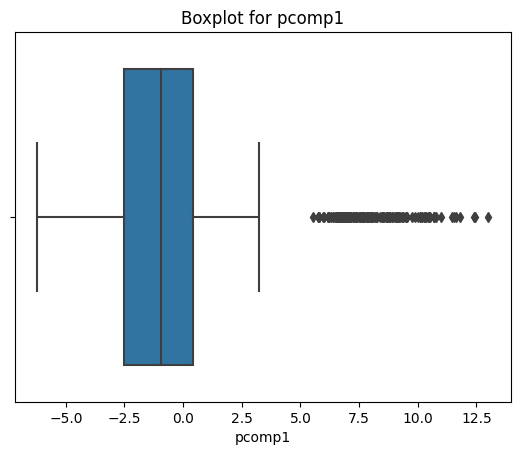

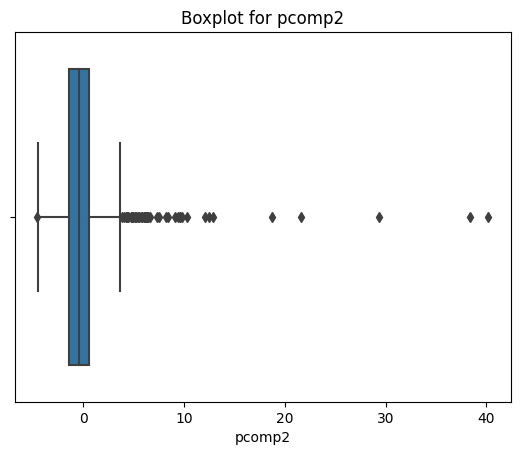

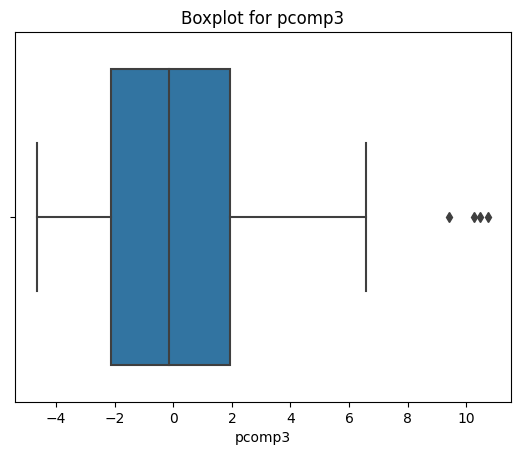

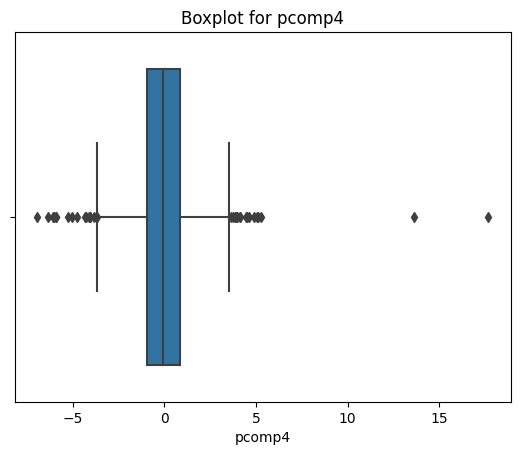

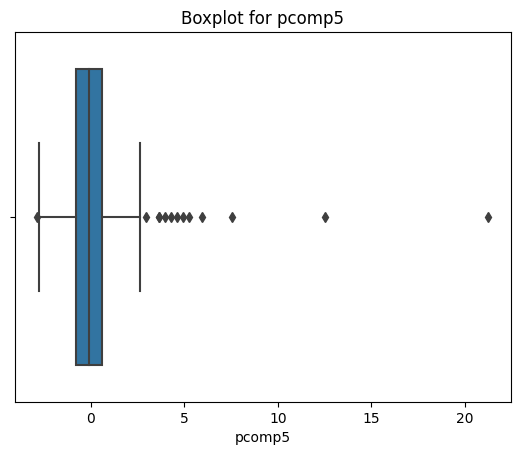

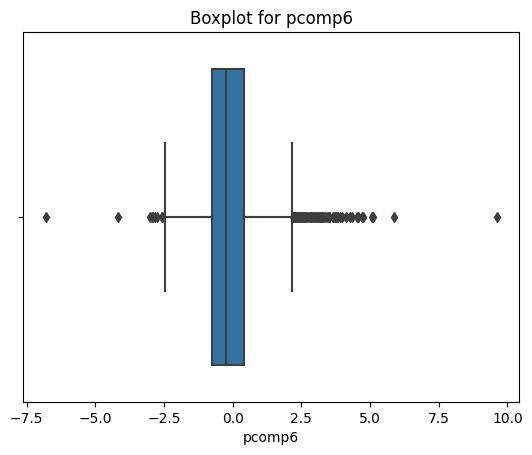

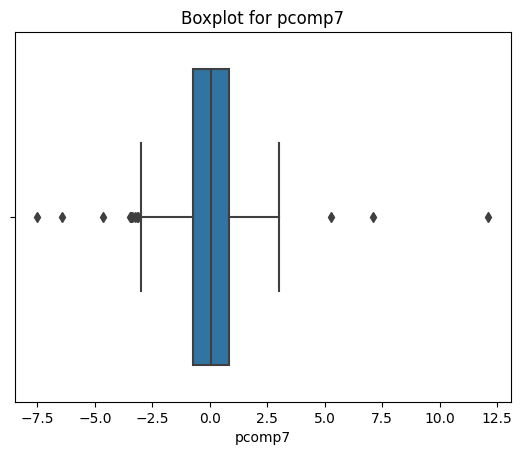

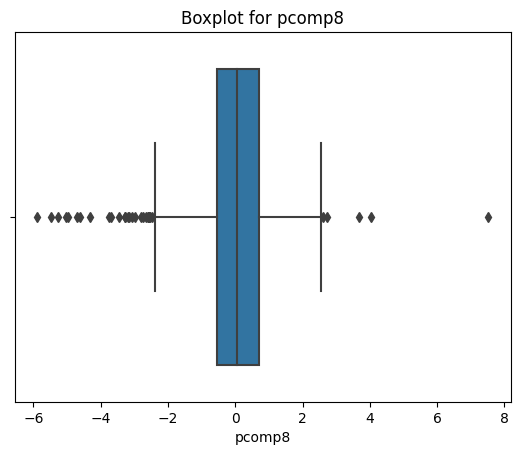

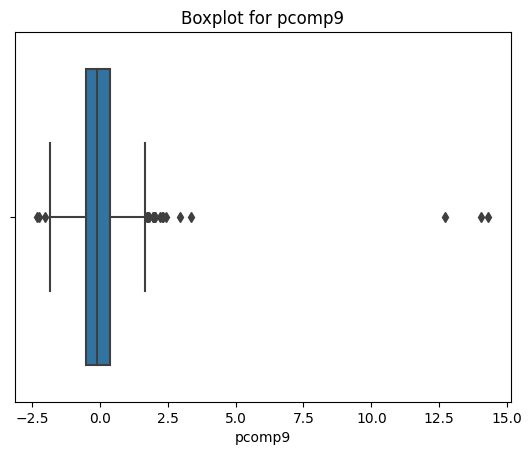

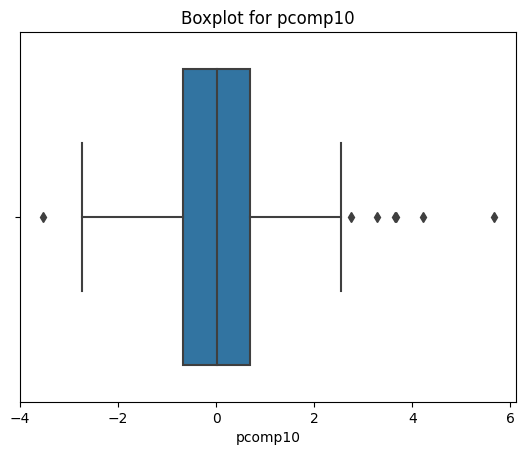

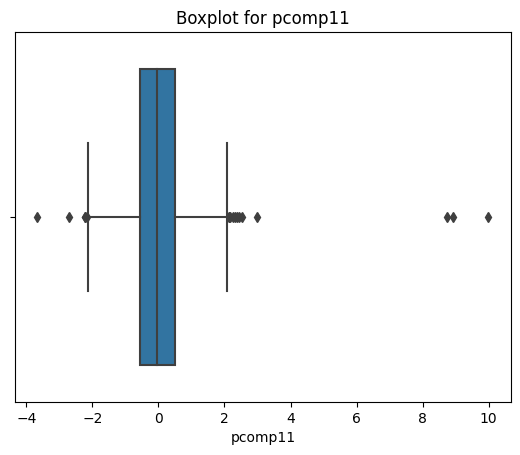

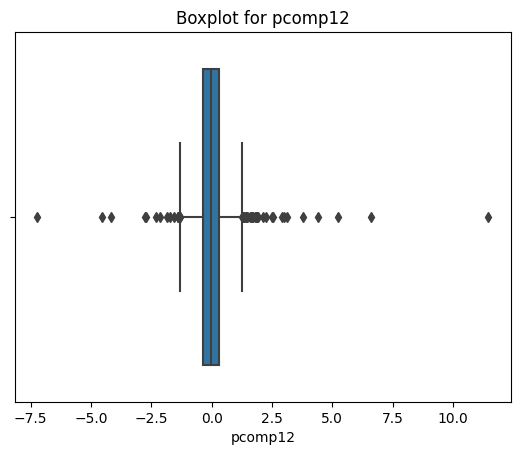

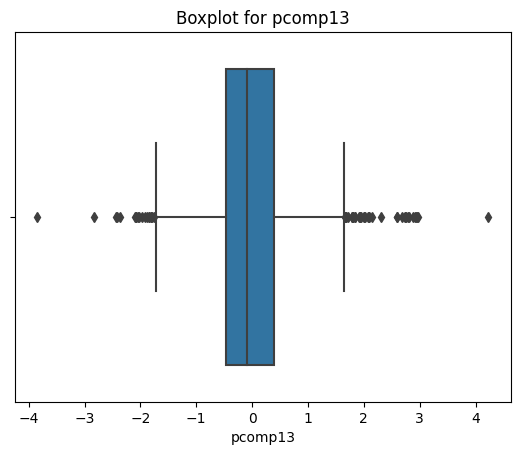

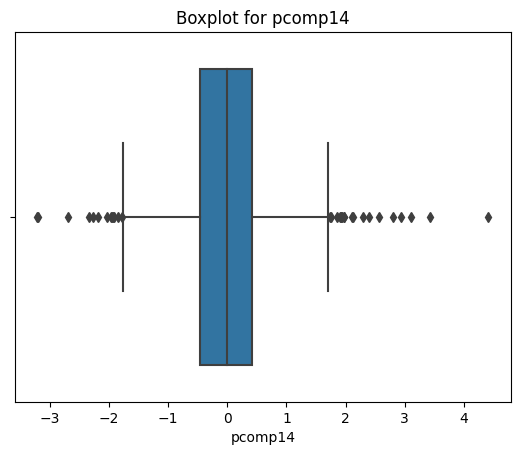

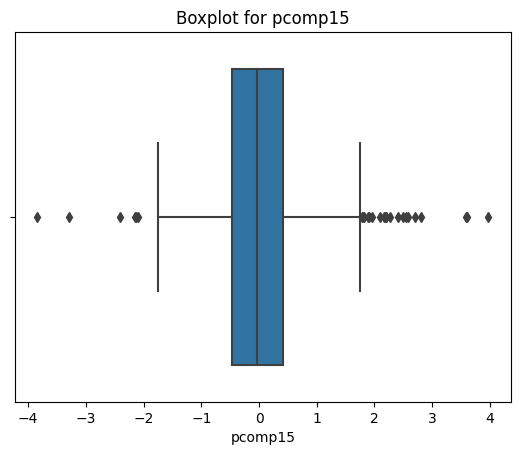

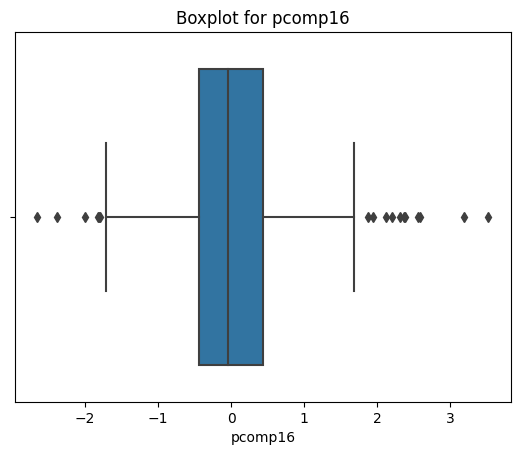

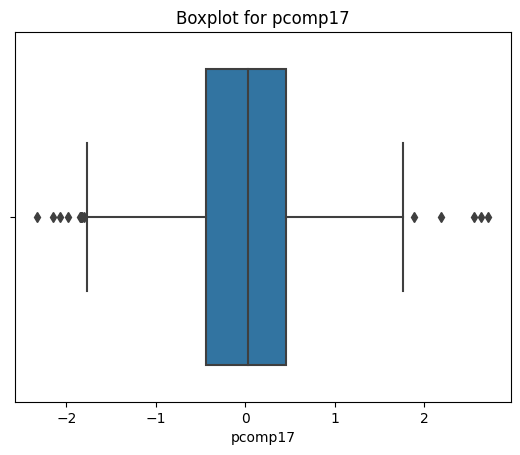

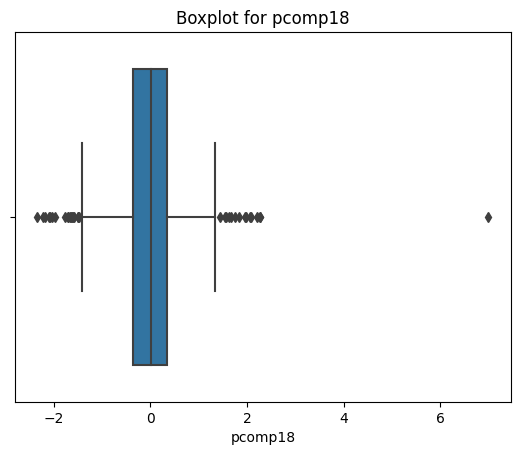

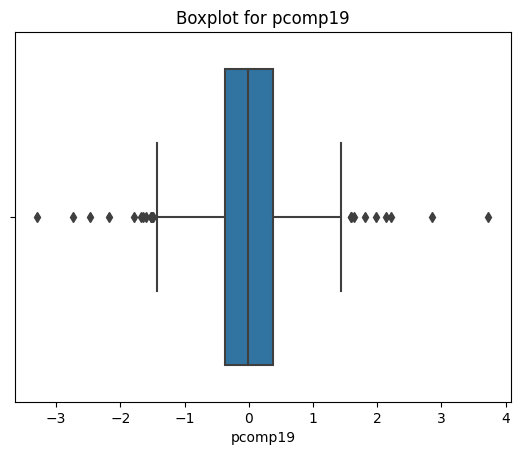

In [ ]:
for i in pca_df.columns[:]:
    sns.boxplot(x=pca_df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()
#boxplots to show outliers

In [ ]:
def fix_outliers_iqr(df):
  for i in df.columns:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75) 
    iqr= q3-q1 #inter quartile range

    lower_val= q1-1.5*iqr 
    higher_val = q3+1.5*iqr
    df[i]= np.where(df[i]< lower_val,lower_val,
                    np.where(df[i]>higher_val,higher_val,df[i]))
  return df
#creating a func to fix all of the outliers value at once i am using inter quartile range here. there are 
#other methods to like check std dev, i am using this because boxplot use this

In [ ]:
fix_outliers_iqr(pca_df)
#calling the function

<ipython-input-36-01f99c2eed0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= np.where(df[i]< lower_val,lower_val,


,pcomp1,pcomp2,pcomp3,pcomp4,pcomp5,pcomp6,pcomp7,pcomp8,pcomp9,pcomp10,pcomp11,pcomp12,pcomp13,pcomp14,pcomp15,pcomp16,pcomp17,pcomp18,pcomp19
0,1.227632,3.664818,0.464324,0.976161,-1.626496,1.893034,-1.007890,-0.227502,-0.707230,-0.685697,0.463605,1.253980,1.659043,-0.998936,0.355038,0.530063,0.752884,1.113416,-0.507109
1,-1.640596,3.664818,7.996637,3.571000,2.698017,-2.519822,-3.033651,2.578439,1.715310,-0.705308,-2.123205,-1.323740,-1.743042,1.720288,-1.810184,-0.702846,0.353829,-0.887723,1.414367
2,0.410355,0.060385,-0.739355,0.955957,0.461611,2.165695,-2.614580,0.317294,0.341410,-0.185052,-0.143835,1.035774,1.659043,-1.246755,1.507742,1.264048,0.305804,-0.862163,0.327388
3,0.876264,3.664818,0.460593,0.614066,-0.613413,2.165695,-3.033651,-0.987141,-0.199169,-0.657297,0.382184,1.076541,1.659043,-0.934546,1.266621,1.660927,-0.718508,0.375805,-1.491981
4,-0.844398,1.990541,-0.867586,2.878019,-0.871921,0.365747,-1.982305,0.986431,-1.083275,-0.100530,1.907415,-0.379579,1.659043,-0.689662,0.747809,0.959199,0.110291,0.560089,-0.224724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,-3.024067,-1.392976,1.453863,0.287901,0.453517,-1.399216,1.475200,-0.800713,0.584019,0.109725,-1.028648,0.094283,-0.496211,-0.057548,0.797064,0.223938,-0.458175,0.320114,-0.699639
933,-3.326499,-1.360093,0.916048,1.349711,0.230686,-1.528841,1.794733,-1.592833,0.470122,-0.118260,-1.016693,0.106812,-0.340635,-0.199777,0.596972,0.733565,-0.513528,0.153354,-0.775106
934,-2.625019,-1.789604,2.999078,-0.516659,-0.195746,-2.122265,0.251883,-1.274110,-0.267443,1.866604,0.277858,-0.252226,0.241321,1.476845,-0.862440,1.198512,-0.130000,0.376333,-0.712985
935,-3.131980,-1.749667,1.939704,-0.027820,0.335075,-1.369662,1.081393,-0.939340,0.212505,1.238465,-0.808681,0.014955,0.390338,1.348247,0.305239,0.149205,0.312140,0.082287,-0.375099


<Figure size 300x200 with 0 Axes>

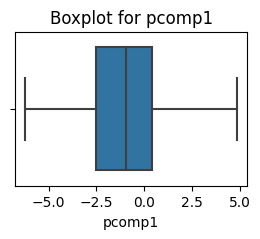

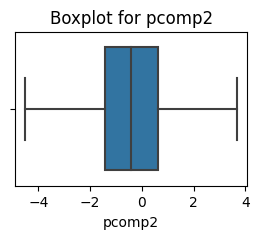

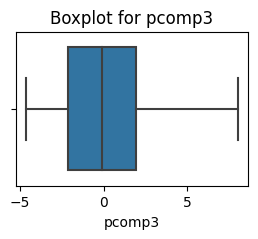

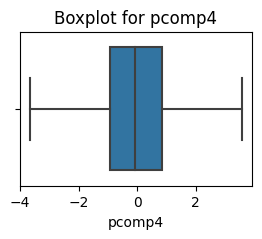

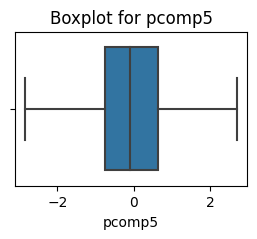

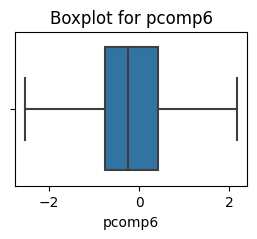

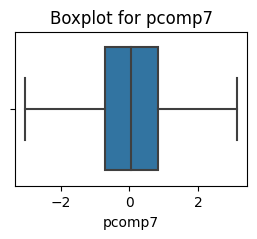

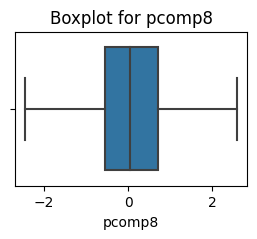

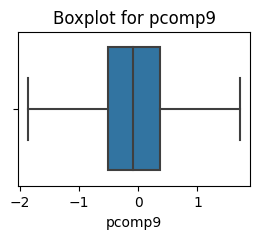

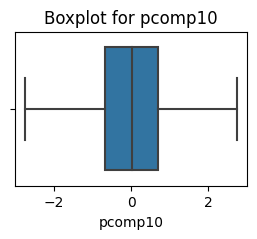

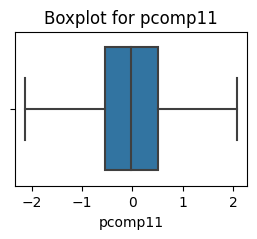

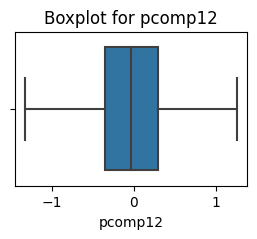

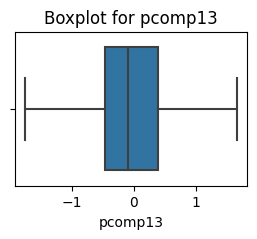

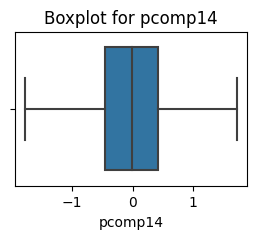

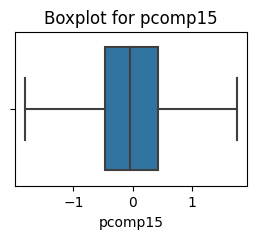

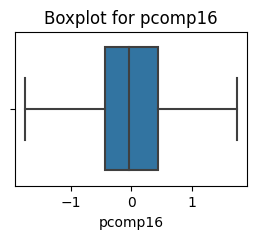

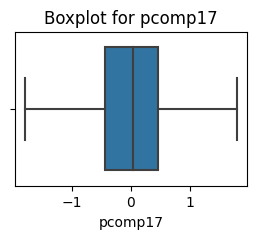

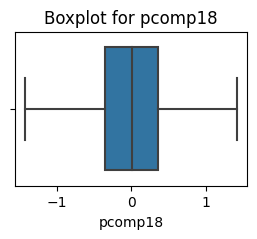

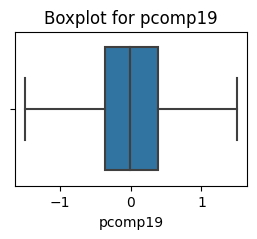

In [ ]:
plt.figure(figsize=(3,2))
for i in pca_df.columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=pca_df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()
#checking outliers again

<Axes: >

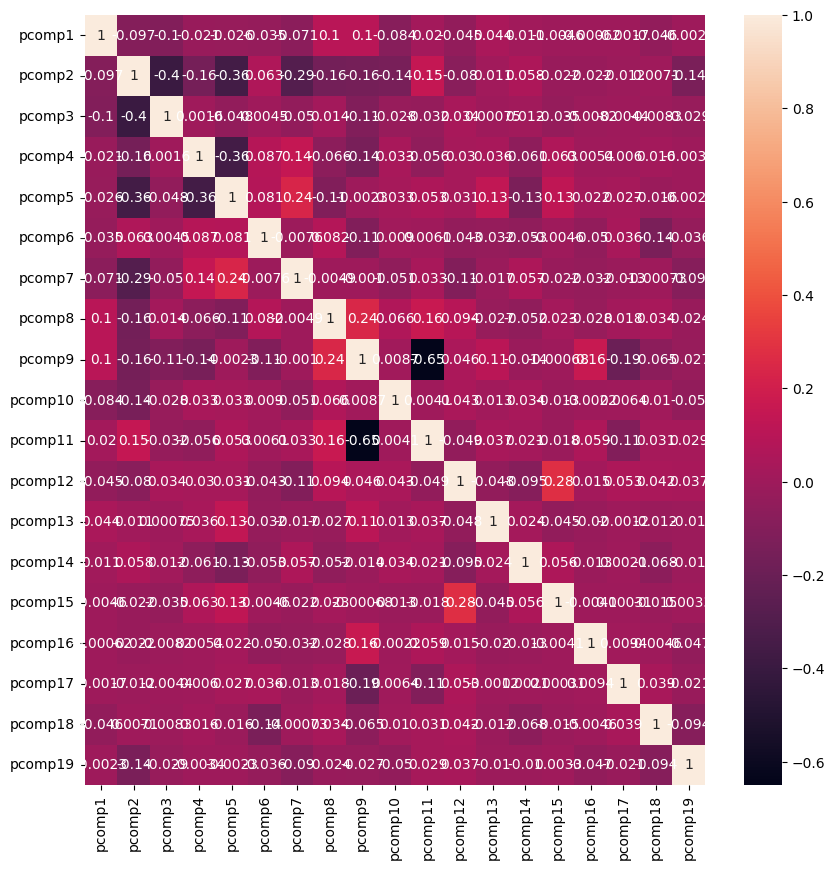

In [ ]:
plt.figure(figsize=(10,10))
corr= pca_df.corr()
sns.heatmap(corr, annot= True)
#checking correlation between columns

In [ ]:
corr= corr[corr>0.85]
corr
#checking if there are any columns with higher correlation then 85%

,pcomp1,pcomp2,pcomp3,pcomp4,pcomp5,pcomp6,pcomp7,pcomp8,pcomp9,pcomp10,pcomp11,pcomp12,pcomp13,pcomp14,pcomp15,pcomp16,pcomp17,pcomp18,pcomp19
pcomp1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcomp10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(pca_df,y, test_size= 0.30, random_state= 20)
# spliting the data into train and test data

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(655, 19)
(282, 19)
(655,)
(282,)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [ ]:
d= {'model':[],'tp':[],'fn':[],'fp':[],'tn':[],'acc':[],'auc':[]}

In [ ]:
def model_eval(model,model_name,xtest,ytest,ypred):
  cm= confusion_matrix(ytest,ypred)
  print(cm)
  cr= classification_report(ytest,ypred)
  print(cr)
  acc= accuracy_score(ytest,ypred)
  print(acc)
  auc= roc_auc_score(ytest,model.predict_proba(xtest)[:,1])
  print(auc)
  d['model'].append(model_name)
  d['tp'].append(cm[0,0])
  d['fn'].append(cm[0,1])
  d['fp'].append(cm[1,0])
  d['tn'].append(cm[1,1])
  d['acc'].append(acc)
  d['auc'].append(auc)
#creating a func that will show all the necessory evaluation techniques and it will store few information
#in a variable d

In [ ]:
def mscore(model):
  print('train score',model.score(xtrain,ytrain))
  print('test score', model.score(xtest,ytest))
#function to check model score

In [ ]:
def plot_roc_curve(model,ytest):
  fpr,tpr,thresh= roc_curve(ytest,model.predict_proba(xtest)[:,1])
  auc= roc_auc_score(ytest,model.predict_proba(xtest)[:,1])
  print('area under cureve', auc)
  plt.plot(fpr,tpr, color='orange')
  plt.plot([0,1],[0,1])
  plt.legend()
  plt.show()
#funtion to plot area under curve

In [ ]:
from sklearn.linear_model import LogisticRegression
#performing logistic regression

In [ ]:
lr= LogisticRegression(max_iter= 1000, solver='liblinear')
lr.fit(xtrain,ytrain)
mscore(lr)

train score 0.9755725190839695
test score 0.950354609929078


In [ ]:
ypredlr= lr.predict(xtest)
#predicting xtest

In [ ]:
model_eval(lr,'log_reg',xtest,ytest,ypredlr)
#checking scores

[[263   2]
 [ 12   5]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       265
           1       0.71      0.29      0.42        17

    accuracy                           0.95       282
   macro avg       0.84      0.64      0.70       282
weighted avg       0.94      0.95      0.94       282

0.950354609929078
0.9402885682574917


area under cureve 0.9402885682574917


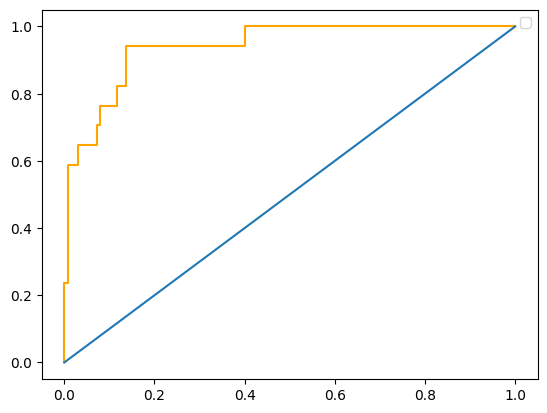

In [ ]:
plot_roc_curve(lr,ytest)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#performing  DecisionTree Classification

In [ ]:
dt= DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_split= 10)
dt.fit(xtrain,ytrain)
print(mscore(lr))

train score 0.9755725190839695
test score 0.950354609929078
None


In [ ]:

ypreddt= dt.predict(xtest)
print(ypreddt)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
model_eval(dt,'dt',xtest,ytest,ypreddt)

[[262   3]
 [ 14   3]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       265
           1       0.50      0.18      0.26        17

    accuracy                           0.94       282
   macro avg       0.72      0.58      0.61       282
weighted avg       0.92      0.94      0.93       282

0.9397163120567376
0.7183129855715871


area under cureve 0.7183129855715871


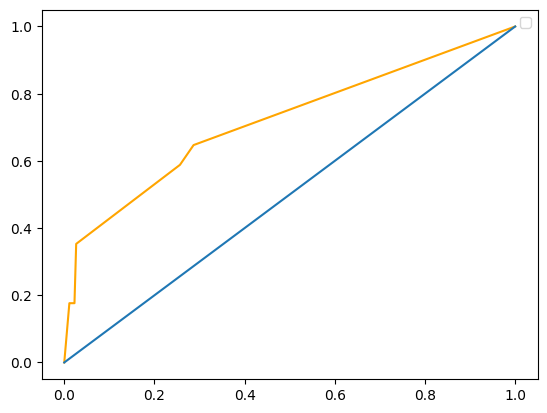

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
plot_roc_curve(dt,ytest)
plt.show

In [ ]:
#performing  Bagging Classification
bgdt= BaggingClassifier(base_estimator=dt,n_estimators= 30,random_state=42)

In [ ]:
bgdt.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_split=10),
                  n_estimators=30, random_state=42)

In [ ]:
mscore(bgdt)

train score 0.983206106870229
test score 0.9468085106382979


In [ ]:
ypredbgdt= bgdt.predict(xtest)

In [ ]:
model_eval(bgdt,'baggingdt',xtest,ytest,ypredbgdt)

[[263   2]
 [ 13   4]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       265
           1       0.67      0.24      0.35        17

    accuracy                           0.95       282
   macro avg       0.81      0.61      0.66       282
weighted avg       0.94      0.95      0.93       282

0.9468085106382979
0.8451720310765816


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#performing  random forest Classification


In [ ]:
rfc= RandomForestClassifier(n_estimators= 100,random_state=40,criterion= 'gini',max_depth=5)
rfc.fit(xtrain,ytrain)
mscore(rfc)

train score 0.9862595419847329
test score 0.9468085106382979


In [ ]:
ypredrfc= rfc.predict(xtest)
model_eval(rfc,'random_forest',xtest,ytest,ypredrfc)

[[265   0]
 [ 15   2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       265
           1       1.00      0.12      0.21        17

    accuracy                           0.95       282
   macro avg       0.97      0.56      0.59       282
weighted avg       0.95      0.95      0.93       282

0.9468085106382979
0.8914539400665926


area under cureve 0.8914539400665926


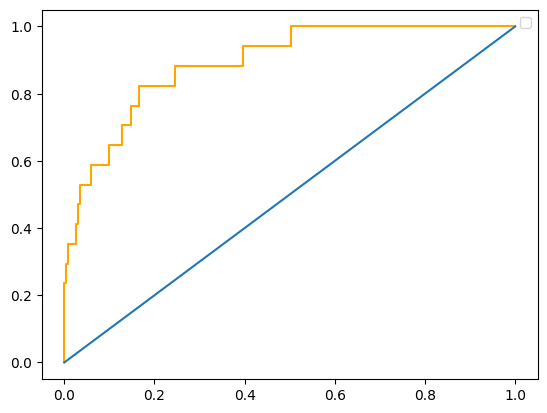

In [ ]:
plot_roc_curve(rfc,ytest)
plt.show()

In [ ]:
bgrf= BaggingClassifier(base_estimator=rfc,n_estimators= 100,random_state=20)
bgrf.fit(xtrain,ytrain)
mscore(bgrf)
#performing  Bagging Classification using random forest


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


train score 0.9801526717557252
test score 0.9468085106382979


In [ ]:
ypredbgrf= bgrf.predict(xtest)

In [ ]:
model_eval(bgrf,'baggingrf',xtest,ytest,ypredbgrf)

[[265   0]
 [ 15   2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       265
           1       1.00      0.12      0.21        17

    accuracy                           0.95       282
   macro avg       0.97      0.56      0.59       282
weighted avg       0.95      0.95      0.93       282

0.9468085106382979
0.8992230854605994


area under cureve 0.8992230854605994


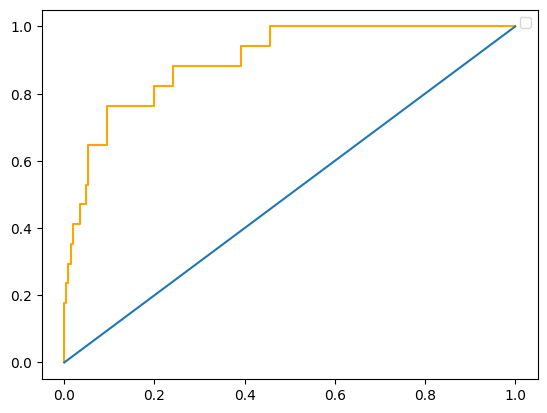

In [ ]:
plot_roc_curve(bgrf,ytest)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#performing  adaboost Classification


In [ ]:
adab= AdaBoostClassifier(n_estimators=20)
adab.fit(xtrain,ytrain)
mscore(adab)

train score 0.9801526717557252
test score 0.9645390070921985


In [ ]:
ypredada= adab.predict(xtest)
model_eval(adab,'adaboost',xtest,ytest,ypredada)

[[263   2]
 [  8   9]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       265
           1       0.82      0.53      0.64        17

    accuracy                           0.96       282
   macro avg       0.89      0.76      0.81       282
weighted avg       0.96      0.96      0.96       282

0.9645390070921985
0.9481687014428413


area under cureve 0.9481687014428413


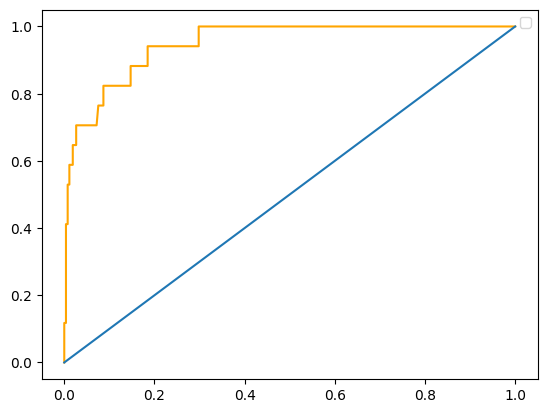

In [ ]:
plot_roc_curve(adab,ytest)

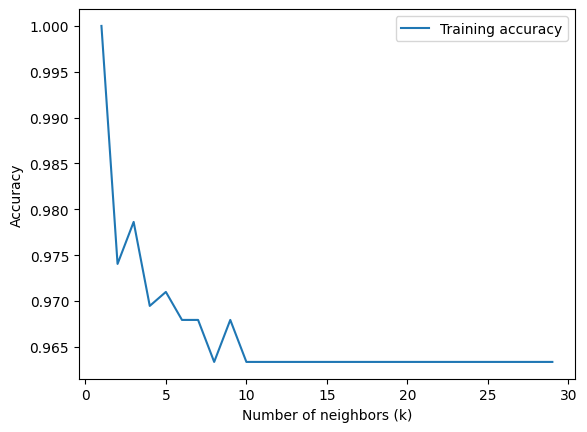

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 30)
train_acc=[]
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    
    train_acc.append(knn.score(xtrain, ytrain))

# Plot the training and validation accuracies as a function of k
plt.plot(k_values, train_acc, label="Training accuracy")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#function to create a chart to use elbow method to find best value of k

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
mscore(knn)

train score 0.9786259541984733
test score 0.9574468085106383


In [ ]:
ypredknn= knn.predict(xtest)
model_eval(knn,'knn',xtest,ytest,ypredknn)

[[264   1]
 [ 11   6]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       265
           1       0.86      0.35      0.50        17

    accuracy                           0.96       282
   macro avg       0.91      0.67      0.74       282
weighted avg       0.95      0.96      0.95       282

0.9574468085106383
0.8066592674805771


area under cureve 0.8066592674805771


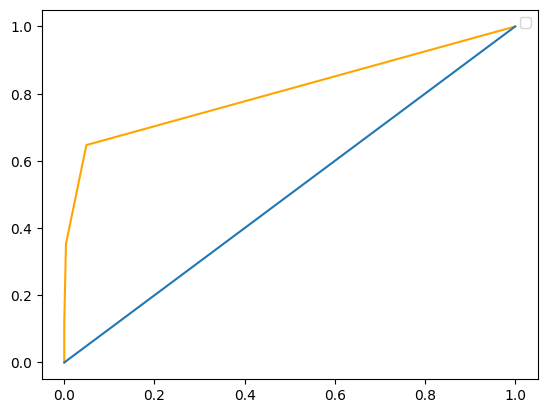

In [ ]:
plot_roc_curve(knn,ytest)
plt.show()

In [ ]:
print(d)

{'model': ['log_reg', 'dt', 'baggingdt', 'random_forest', 'baggingrf', 'adaboost', 'knn'], 'tp': [263, 262, 263, 265, 265, 263, 264], 'fn': [2, 3, 2, 0, 0, 2, 1], 'fp': [12, 14, 13, 15, 15, 8, 11], 'tn': [5, 3, 4, 2, 2, 9, 6], 'acc': [0.950354609929078, 0.9397163120567376, 0.9468085106382979, 0.9468085106382979, 0.9468085106382979, 0.9645390070921985, 0.9574468085106383], 'auc': [0.9402885682574917, 0.7183129855715871, 0.8451720310765816, 0.8914539400665926, 0.8992230854605994, 0.9481687014428413, 0.8066592674805771]}


In [ ]:
modeltest= pd.DataFrame(d)
# converting d into a Dataframe

In [ ]:
modeltest
#checing different scores

,model,tp,fn,fp,tn,acc,auc
0,log_reg,263,2,12,5,0.950355,0.940289
1,dt,262,3,14,3,0.939716,0.718313
2,baggingdt,263,2,13,4,0.946809,0.845172
3,random_forest,265,0,15,2,0.946809,0.891454
4,baggingrf,265,0,15,2,0.946809,0.899223
5,adaboost,263,2,8,9,0.964539,0.948169
6,knn,264,1,11,6,0.957447,0.806659


**adaboost is the best model for this data set so will train and test entire database on adaboost now
**

In [100]:
model= AdaBoostClassifier(n_estimators=20)

model.fit(pca_df,y)

AdaBoostClassifier(n_estimators=20)

In [101]:
import pickle
pickle.dump(model,open('prediction.pkl','wb'))

In [102]:
loaded= pickle.load(open('prediction.pkl','rb'))

In [103]:
random20= pca_df.sample(n=20)


In [104]:
predict= loaded.predict(random20)

In [105]:
predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
random20['predicted']= predict

In [117]:
random20.sample(6)

,index,pcomp1,pcomp2,pcomp3,pcomp4,pcomp5,pcomp6,pcomp7,pcomp8,pcomp9,...,pcomp11,pcomp12,pcomp13,pcomp14,pcomp15,pcomp16,pcomp17,pcomp18,pcomp19,predicted
9,786,-2.308784,-1.801501,2.242833,-1.534658,1.115639,1.960579,0.232277,1.375025,-0.142333,...,0.126781,0.006503,-0.757734,-1.146605,-0.999878,0.508446,0.820272,-0.634843,-0.428187,0
15,342,-0.121663,-0.452057,-1.711000,0.189461,0.287744,-0.596871,0.331123,-0.710522,0.106195,...,-0.208994,-0.959587,0.222344,-0.944907,-0.761308,-0.630584,-0.482858,-0.688808,0.737365,0
7,217,-1.427978,-0.374994,-1.471866,-3.033551,1.720746,2.165695,-0.402258,0.597996,0.048101,...,0.537335,-1.180245,0.390329,-0.042074,-1.553681,0.871505,0.215899,0.522318,0.832761,0
10,267,-2.217335,0.567903,-3.212420,-0.575805,1.278635,-0.888800,1.495568,-2.002778,-0.381918,...,0.472018,-0.910289,0.214879,0.203465,0.076038,0.541462,-0.346230,-0.001691,-0.356183,0
5,311,-2.128069,0.155654,-1.981035,1.986016,1.428275,2.165695,-1.211388,-0.054978,-0.434030,...,0.928149,0.937876,1.659043,-1.098913,0.848675,1.161379,-0.248739,-0.887018,1.501516,1
19,349,-1.331042,0.259421,-2.410204,1.987325,0.300258,-0.289348,0.380864,-1.266520,-0.095274,...,0.247194,-0.412221,0.471472,-0.867338,0.139381,0.173119,-1.009593,-0.387186,0.575499,0


In [108]:
random20.reset_index(inplace= True)

In [109]:
final = random20[['index', 'predicted']]


In [110]:
final.head()

,index,predicted
0,412,0
1,313,0
2,820,0
3,126,0
4,586,0


In [111]:
final.shape

(20, 2)

In [120]:
final.to_csv('final.csv', index=False)

In [121]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final (1).csv


In [122]:
a= pd.read_csv('final.csv')

In [123]:
a.head()

,index,predicted
0,412,0
1,313,0
2,820,0
3,126,0
4,586,0
